# Math 104B Final Project Codes

In [1084]:
import numpy as np
import scipy as sp
import matplotlib as matplot
import matplotlib.pyplot as plt
import pandas_datareader as read
import pandas as pd
import yfinance as yf
import random
from tabulate import tabulate

In [1085]:
# First we define our portfolio of stocks and find the historical 
# close prices of each stock

In [1086]:
tick = ("DIS BRK-B SCHW IBM AMZN").split()
close = pd.DataFrame()
for ticker in tick:
    data = yf.Ticker(ticker).history(period='10y')['Close']
    close[ticker] = data

close    

,DIS,BRK-B,SCHW,IBM,AMZN
Date,,,,,
2013-06-07 00:00:00-04:00,58.954670,115.309998,17.980310,131.267548,13.843500
2013-06-10 00:00:00-04:00,58.027401,115.150002,18.069672,130.421494,14.053500
2013-06-11 00:00:00-04:00,58.000122,113.510002,17.622843,129.759918,13.739000
2013-06-12 00:00:00-04:00,57.263763,112.949997,17.506674,127.991440,13.583500
2013-06-13 00:00:00-04:00,58.454674,114.989998,17.908813,129.626297,13.789500
...,...,...,...,...,...
2023-06-01 00:00:00-04:00,88.589996,323.119995,52.700001,129.820007,122.769997
2023-06-02 00:00:00-04:00,90.769997,329.480011,54.369999,132.419998,124.250000
2023-06-05 00:00:00-04:00,91.000000,328.579987,54.410000,132.639999,125.300003


In [1087]:
# now we calculate returns and the covariance matrix between each stock


In [1088]:
returns = close / close.shift(1)
mean_ret = returns.mean()
print(mean_ret)

# now we take the log of the data to normalize it 
log_returns = np.log(returns)
mean_ret_log = log_returns.mean()
print(mean_ret_log)

# we now find the covariance matrix based on the log returns 
cov = log_returns.cov()*252 # since there are 252 trading days 
print(cov)

DIS      1.000324
BRK-B    1.000496
SCHW     1.000672
IBM      1.000116
AMZN     1.001082
dtype: float64
DIS      0.000180
BRK-B    0.000422
SCHW     0.000445
IBM      0.000007
AMZN     0.000867
dtype: float64
            DIS     BRK-B      SCHW       IBM      AMZN
DIS    0.072445  0.030569  0.043296  0.026944  0.035332
BRK-B  0.030569  0.037355  0.042079  0.027015  0.024410
SCHW   0.043296  0.042079  0.114608  0.035561  0.033617
IBM    0.026944  0.027015  0.035561  0.055158  0.022623
AMZN   0.035332  0.024410  0.033617  0.022623  0.108071


/Users/markmetrovich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [1379]:
# now we go through our random weight allocation 
random.seed(1234)

def weights(n):
    num = np.random.rand(n)
    return(num / sum(num))
exp_return = []
sigma = []
wts = []
for i in range(10000):
    w = weights(len(tick))
    #exp_return.append(np.dot(w,mean_ret_log.T))
    exp_return.append((np.dot(w,mean_ret_log.T)+1)**(252) -1)
    sigma.append((np.sqrt(np.dot(np.dot(w.T,cov),w))))
    wts.append(w)


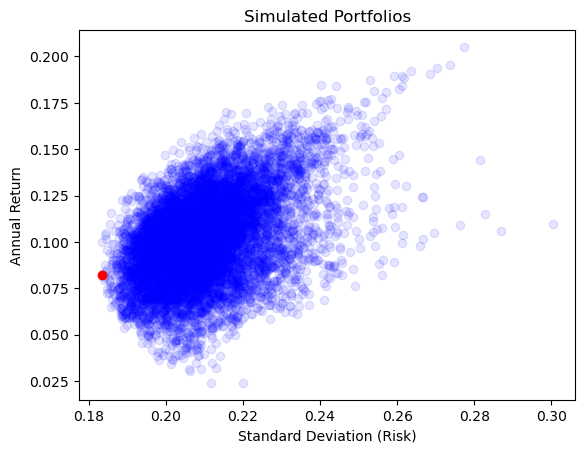

In [1380]:
plt.plot(sigma,exp_return,'bo', alpha = 0.1)
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("Annual Return")
plt.title("Simulated Portfolios")
min_var = min(sigma)
ind = sigma.index(min(sigma))

plt.plot(min_var, exp_return[ind], color="red", marker ="o")
plt.show()

In [1381]:
# now that we have all the information plotted, we use methods to 
# find the optimal portfolio, which returns the highest sharpe ratio

# we recall the sharpe ratio is port return - risk free rate / port sd
# we assume here the risk free rate is 0
sharpe_ratios = []
for ret, sd in zip(exp_return,sigma):
    sharpe_ratios.append(ret/sd)
col_names = ("Sharpe Ratio", "Annual Returns", "Standard Deviation")
full_data = pd.DataFrame(list(zip(sharpe_ratios,exp_return,sigma)), columns = col_names)
full_data

,Sharpe Ratio,Annual Returns,Standard Deviation
0,0.438072,0.093271,0.212913
1,0.627667,0.141873,0.226032
2,0.394885,0.085700,0.217024
3,0.518096,0.108843,0.210082
4,0.332376,0.063868,0.192155
...,...,...,...
9995,0.392961,0.080377,0.204541
9996,0.421620,0.087504,0.207543
9997,0.414816,0.092704,0.223482
9998,0.623276,0.131106,0.210350


In [1408]:
print(full_data.iloc[3067])
wts[3067]

Sharpe Ratio          0.787214
Annual Returns        0.169784
Standard Deviation    0.215677
Name: 3067, dtype: float64


array([0.00853646, 0.48065168, 0.04736103, 0.00552412, 0.4579267 ])

In [1382]:
# now that we have the full data, lets find the portfolio with the highest sharpe ratio, said the be our most efficient
np.asmatrix(full_data)
eff_s = np.amax(full_data,0)[2]
eff_ret = np.amax(full_data,0)[1]

np.amax(full_data,0)
eff_sharpe = eff_ret/eff_s

max_sharpe=full_data.nlargest(1,['Sharpe Ratio'])
print(max_sharpe) # update index for this in next lines

      Sharpe Ratio  Annual Returns  Standard Deviation
3067      0.787214        0.169784            0.215677


In [1383]:
eff_ret = full_data.loc[3067,'Annual Returns']
eff_s = full_data.loc[3067, 'Standard Deviation']

In [1385]:
matrix = np.column_stack((sigma,exp_return))
matrix = matrix[matrix[:,0].argsort()]

In [1386]:
def get_points(m,h):
    
    def find_indx(i):
        for k, row in enumerate(matrix):
            if i in row:
                return(k)
        return k

    max_ret = []
    rets =[]
    sigs = []

    for i in range(len(sigma)):
        if m <= matrix[i,0] < m+h:
            rets.append(matrix[i,1])
        else:
            max_ret.append(max(rets))
            sigs.append(matrix[find_indx(max(rets)),0])
            m+= h
            
    sigs.append(min(sigma))
    sigs.append(eff_s)
    sigs.append(sigma[exp_return.index(max(exp_return))])
    max_ret.append(exp_return[sigma.index(min(sigma))])
    max_ret.append(eff_ret)
    max_ret.append(max(exp_return))
    col_names =('Sigmas', 'Max Ret')
    mat = pd.DataFrame(list(zip(sigs,max_ret)), columns = col_names)
    result_mat = mat.drop_duplicates(subset=['Sigmas', 'Max Ret'], keep='first')

    #min_row = [min(sigma), exp_return[sigma.index(min(sigma))]]
    #max_row = [sigma[exp_return.index(max(exp_return))], max(exp_return)]
    #min_row = pd.Series(min_row)
    #max_row =pd.Series(max_row)
    #result_mat = pd.concat([result_mat,min_row.to_frame().T])
    #result_mat = pd.concat([result_mat,max_row.to_frame().T])

    result_mat =result_mat.sort_values(by=['Sigmas'])
    sigs = result_mat['Sigmas']
    max_ret = result_mat['Max Ret']
    #return(sigs, max_ret)
    return(result_mat)


In [1387]:
def get_points_g(m,h):
    get_points(m,h)

    plt.plot(sigma,exp_return,'bo', alpha = 0.1)
    plt.xlabel("Standard Deviation (Risk)")
    plt.ylabel("Annual Return ")
    plt.title("Simulated Portfolios")
    min_var = min(sigma)
    ind = sigma.index(min(sigma))
    plt.plot(min(sigma), exp_return[ind], color="green", marker ="o")
    plt.plot(get_points(m,h)['Sigmas'],get_points(m,h)['Max Ret'], 'ro')
    plt.plot(get_points(m,h)['Sigmas'],get_points(m,h)['Max Ret'], 'b-', label = "Point Interpolation")
    plt.plot(eff_s, eff_ret, color = "green", marker = 'o', label ="Max Sharpe Ratio")
    plt.legend()
    plt.show()


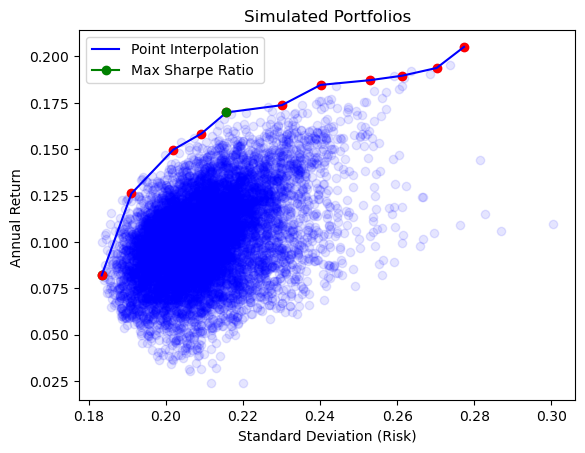

In [1388]:
get_points_g(m=min(sigma), h=0.01)

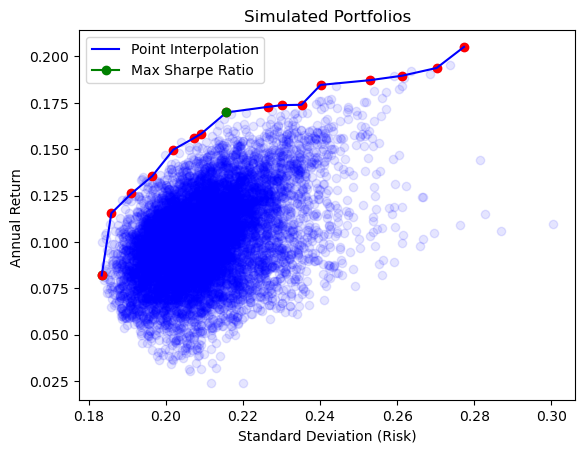

In [1389]:
get_points_g(m=min(sigma), h=0.005)

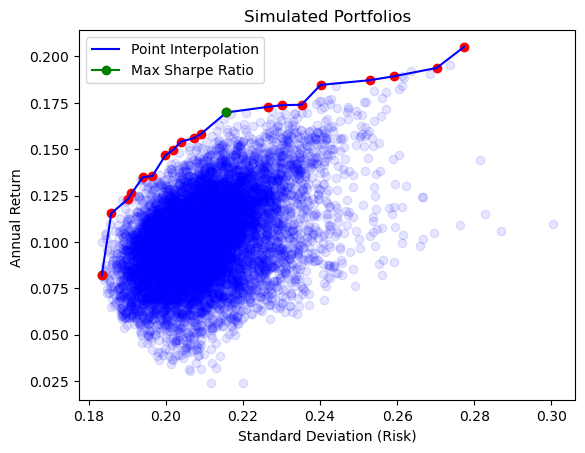

In [1390]:
get_points_g(m=min(sigma), h=0.0025)

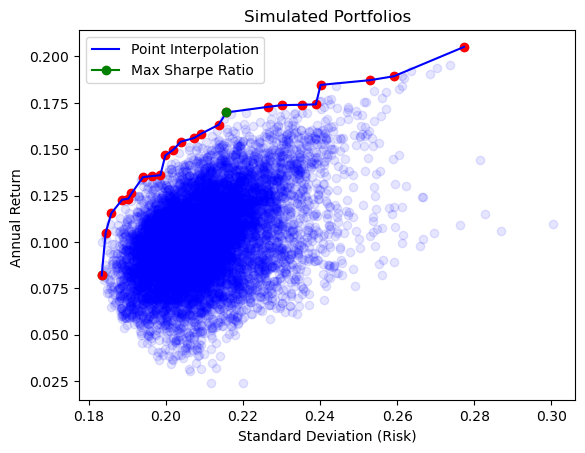

In [1391]:
get_points_g(m=min(sigma), h=0.00125)

In [1347]:

from scipy.interpolate import interp1d

def get_quad_int(sn,rn):

    interp_func = interp1d(sn, rn, kind='quadratic')

    new_x= np.linspace(sn.min(), sn.max(),100)

    new_y= interp_func(new_x)
    
    return new_x, new_y



In [1348]:

def get_quad_spline(sn,rn):
    
    x = np.array(sn)  # x-coordinates
    y = np.array(rn)  # y-coordinates

    # Create spline function
    spline_interp = interp1d(x, y, kind='quadratic')

    # Generate points for plotting
    x_values = np.linspace(min(x), max(x), 100)
    y_values = spline_interp(x_values)

    return x_values, y_values

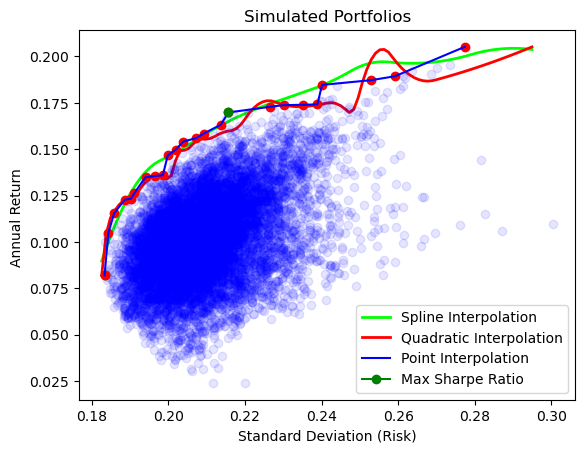

,Sharpe Ratio,Annual Returns,Standard Deviation
3067,0.787214,0.169784,0.215677


In [1392]:

sn = get_points(m=min(sigma),h = 0.00125)['Sigmas']


rn = get_points(m=min(sigma), h=0.00125)['Max Ret']


get_quad_spline(sn,rn)

get_quad_int(sn,rn)

plt.plot(x_values, y_values,color='lime',linewidth = 2, label='Spline Interpolation')
plt.plot(x_values, get_quad_int(sn,rn)[1],color ='red', linewidth = 2, label='Quadratic Interpolation')
plt.legend()
get_points_g(m=min(sigma), h=0.00125)
max_sharpe

In [2]:
wts[3067]


NameError: name 'wts' is not defined